# Variational quantum kernel density estimation with 2 Dimensional data sets

Data taken from https://zenodo.org/records/7822851



# GPU

In [3]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


# Libraries

In [4]:
!pip install tensorcircuit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.0/342.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 7.6 MB/s eta 0:00:00


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors
from IPython.display import display, Math
import math
import tensorcircuit as tc
from tensorcircuit import keras

In [6]:
!pip install git+https://github.com/diegour1/qmc.git

  Cloning https://github.com/diegour1/qmc.git to /tmp/pip-req-build-cx6jqyur
  Running command git clone --filter=blob:none --quiet https://github.com/diegour1/qmc.git /tmp/pip-req-build-cx6jqyur
  Resolved https://github.com/diegour1/qmc.git to commit 4c2db4b21508f28466743eaf0b13fe70814f65dc
  Preparing metadata (setup.py) ... done
  Created wheel for qmc: filename=qmc-0.0.1-py3-none-any.whl size=12988 sha256=ee53fbfe148e59dde1a870880c06e35b9e3d5d3dad2b709cd21052ce391e5cbc
  Stored in directory: /tmp/pip-ephem-wheel-cache-6vq30tjd/wheels/9f/94/66/55600fd5fe039b621ab7ee795c96f41946d90a9efaf4914d6e
Successfully built qmc


In [7]:
#!nvidia-smi

# 2 Dimensions

In [8]:
import matplotlib.pyplot as plt

def plot(X_train, X_train_density, X_test, X_test_density, name = "dataset"):
    plt.axes(frameon = 0)
    plt.grid()
    plt.scatter(X_test[:,0],  X_test[:,1], c = X_test_density , alpha = .5, s = 3, linewidths= 0.0000001)
    plt.colorbar()
    plt.title('arc dataset')
    plt.savefig(f'{name}.png',dpi = 300)
    plt.show()

# 2 Dim Datasets

## Binomial dataset

In [9]:

tfd = tfp.distributions

# Initialize a single 2-variate Gaussian.
mvn = tfd.MultivariateNormalDiag(
    loc=[1., -1],
    scale_diag=[1, 2.])

X = mvn.sample(sample_shape=12000, seed = 1)


In [8]:
from sklearn.metrics.pairwise import euclidean_distances
A = euclidean_distances(X, X)
A[np.triu_indices_from(A, k=1)]

array([7.903375 , 2.0053937, 7.350419 , ..., 1.0203874, 2.5100377,
       1.5725329], dtype=float32)

In [ ]:
batch_size = 32

from  sklearn import model_selection
X_train, val_data = model_selection.train_test_split(X.numpy(), test_size=0.1666666)

train_dataset = tf.data.Dataset.from_tensor_slices(X_train)
batched_train_data = train_dataset.batch(batch_size)

In [ ]:
x, y = np.mgrid[-6:6:.1, -6:6:.1]
pos = np.dstack((x, y))
X_plot = pos.reshape([14400,2])

real_prob = mvn.prob(X_plot)

log max probability: tf.Tensor(
[8.00581593e-14 9.06043361e-14 1.02283904e-13 ... 1.77889403e-09
 1.50266632e-09 1.26616140e-09], shape=(14400,), dtype=float32)
log min probability: tf.Tensor(
[8.00581593e-14 9.06043361e-14 1.02283904e-13 ... 1.77889403e-09
 1.50266632e-09 1.26616140e-09], shape=(14400,), dtype=float32)


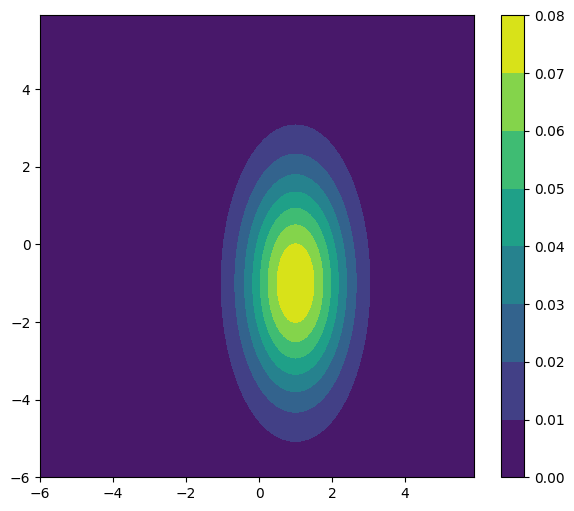

In [ ]:
params = {
   'axes.labelsize': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [7.0, 6.0]
   }
plt.rcParams.update(params)

print("log max probability:", real_prob)
print("log min probability:", real_prob)

#fig2 = plt.figure()
#ax2 = fig2.add_subplot(111)
plt.contourf(x, y, real_prob.numpy().reshape([120,120]))
plt.colorbar()
plt.savefig("spiralsdmkde.pdf")

## Potential 1 dataset

In [ ]:
def load_potential_1(train_size, test_size, dimension=2):

    print(f"loading potential_1 trian_size: {train_size} test_size: {test_size} dimension: {dimension}")

    X = np.loadtxt("NF1_1M.csv").astype(np.float32)
    X_densities = np.loadtxt("NF1_1M_densities.csv").astype(np.float32)

    X_train = X[:train_size, :]
    X_train_densities = X_densities[:train_size]
    X_test = X[train_size: train_size + test_size, :]
    X_test_densities = X_densities[train_size: train_size + test_size]

    return X_train, X_train_densities, X_test, X_test_densities



In [ ]:
!gdown --id 1iGX6Ux9agD7Naom0HFAu2sxxaQAKVFVX
!gdown --id 1kW7UPgICZCkjIAWZ-oWDwLCtYl0LMNar

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1iGX6Ux9agD7Naom0HFAu2sxxaQAKVFVX
To: /content/NF1_1M_densities.csv
100% 25.0M/25.0M [00:00<00:00, 150MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1kW7UPgICZCkjIAWZ-oWDwLCtYl0LMNar
To: /content/NF1_1M.csv
100% 51.0M/51.0M [00:00<00:00, 151MB/s]


In [ ]:
X_train, X_train_densities, X_test, X_test_densities = load_potential_1(10000, 2000,dimension=2) #changed to 10000, 2000

loading potential_1 trian_size: 10000 test_size: 2000 dimension: 2


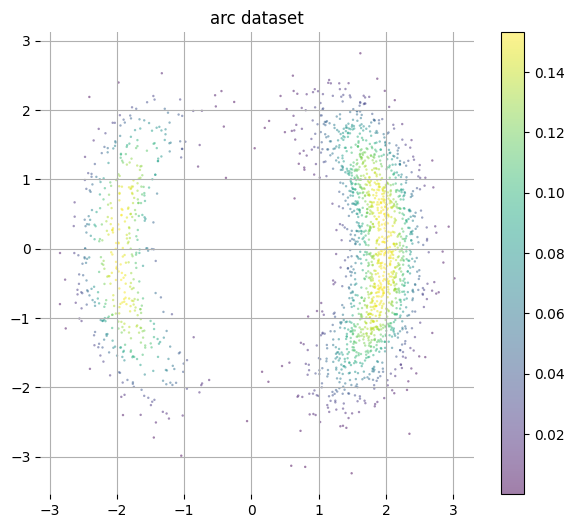

In [ ]:
plot(X_train, X_train_densities, X_test, X_test_densities)

In [ ]:
x, y = np.mgrid[-4:4:(8/120), -4:4:(8/120)]
pos = np.dstack((x, y))
X_plot = pos.reshape([14400,2])

## Potential 2 dataset

In [10]:
!gdown --id 1VSXlzTLtrS5E7QmWwhyRHuSSKE1HvbZX
!gdown --id 18nAP1faHJjpzKskyhenvStI1jM83SIzO

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1VSXlzTLtrS5E7QmWwhyRHuSSKE1HvbZX
To: /content/nf2.npy
100% 880k/880k [00:00<00:00, 71.3MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=18nAP1faHJjpzKskyhenvStI1jM83SIzO
To: /content/NF2_densities.csv
100% 2.75M/2.75M [00:00<00:00, 181MB/s]


In [11]:
def load_potential_2(train_size, test_size, dimension=2):

    print(f"loading potential_2 trian_size: {train_size} test_size: {test_size} dimension: {dimension}")

    X = np.load("nf2.npy").astype(np.float32)
    X_densities = np.loadtxt("NF2_densities.csv").astype(np.float32)

    X_train = X[:train_size, :]
    X_train_densities = X_densities[:train_size]
    X_test = X[train_size: train_size + test_size, :]
    X_test_densities = X_densities[train_size: train_size + test_size]

    return X_train, X_train_densities, X_test, X_test_densities

In [12]:
X_train, X_train_densities, X_test, X_test_densities = load_potential_2(10000, 2000, dimension=2) #changed to 10000

loading potential_2 trian_size: 10000 test_size: 2000 dimension: 2


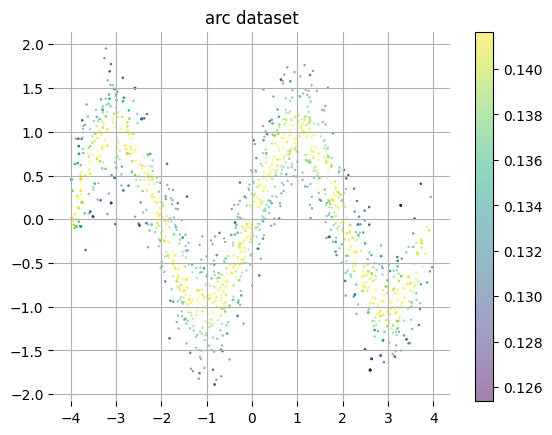

In [13]:
plot(X_train, X_train_densities, X_test, X_test_densities)

In [14]:
x, y = np.mgrid[-4:4:(8/120), -3:3:(6/120)] ## original grid
pos = np.dstack((x, y))
X_plot = pos.reshape([14400,2])

In [15]:
# grid to test the kernel

#x, y = np.mgrid[-2.1:-1.501:(0.6/120), -2:0:(2/120)]
#pos = np.dstack((x, y))
#X_plot = pos.reshape([14400,2])

In [16]:
x

array([[-4.        , -4.        , -4.        , ..., -4.        ,
        -4.        , -4.        ],
       [-3.93333333, -3.93333333, -3.93333333, ..., -3.93333333,
        -3.93333333, -3.93333333],
       [-3.86666667, -3.86666667, -3.86666667, ..., -3.86666667,
        -3.86666667, -3.86666667],
       ...,
       [ 3.8       ,  3.8       ,  3.8       , ...,  3.8       ,
         3.8       ,  3.8       ],
       [ 3.86666667,  3.86666667,  3.86666667, ...,  3.86666667,
         3.86666667,  3.86666667],
       [ 3.93333333,  3.93333333,  3.93333333, ...,  3.93333333,
         3.93333333,  3.93333333]])

## ARC dataset

Weird Gaussians from `Masked Autoregressive Flow for Density Estimation`
***

See the article [here](https://arxiv.org/pdf/1705.07057.pdf) where the distribution of the data is given by the following density:

$$
p(x,y) = \mathcal{N}\left(x_2| 0,4\right) \mathcal{N}\left(x_1|\frac{1}{4}x_2^2,1\right)
$$

### Dataset Generation

In [43]:
dataset_size = 12_000 ## originally 40_000

In [44]:
x2_dist = tfd.Normal(loc=0., scale=4.)
x2_samples = x2_dist.sample(dataset_size)
x1 = tfd.Normal(loc=.25 * tf.square(x2_samples),
                scale=tf.ones(dataset_size, dtype=tf.float32))
x1_samples = x1.sample()
x_samples = tf.stack([x1_samples, x2_samples], axis=1)

In [45]:
X_densities = x2_dist.prob(x_samples[:,1]) * x1.prob(x_samples[:,0])

True densities

In [46]:
x2 = tfp.distributions.Normal(loc = 0., scale = 4.)
x1 = tfp.distributions.Normal(loc = .25 * tf.square(x_samples[:,1]), scale = tf.ones(12_000, dtype=tf.float32))

In [47]:
X_densities = x2.prob(x_samples[:,1]) * x1.prob(x_samples[:,0])

Scatter plot of the data

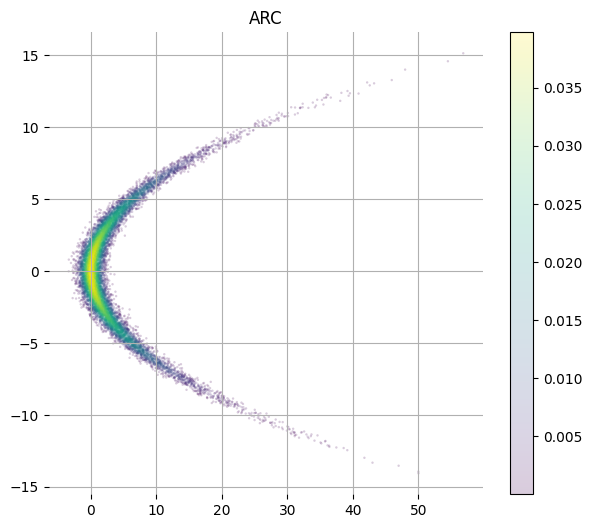

In [48]:
plt.axes(frameon = 0)
plt.grid()
plt.scatter(x_samples[:,0],  x_samples[:,1], c = X_densities.numpy() , alpha = .2, s = 3, linewidths= 0.0000001)
plt.colorbar()
plt.title('ARC')
plt.savefig('alldensities_arc.png',dpi = 300)
plt.show()

To generate mesh grid data that will be used to calculate probability density plot

In [49]:
import scipy.stats

In [50]:
x, y = np.mgrid[-10:40:(50/120), -15:15:(30/120)]
pos = np.dstack((x, y))
X_plot = pos.reshape([14400,2])

real_prob = x2_dist.prob(X_plot[:,1]) * scipy.stats.norm(0.25 * np.square(X_plot[:,1]), 1).pdf(X_plot[:,0])

In [51]:
plt.rcParams["figure.figsize"] = (20*0.25,15*0.25)

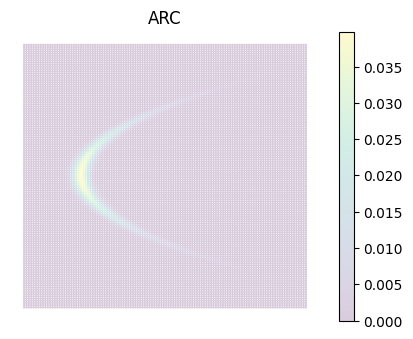

In [52]:
plt.axes(frameon = 0)
plt.grid()
#plt.scatter(x, y, c = real_prob.numpy().reshape([500,300]) , alpha = .2, s = 3, linewidths= 0.0000001)
plt.scatter(x, y, c = real_prob.numpy().reshape([120,120]) , alpha = .2, s = 3, linewidths= 0.0000001)
plt.colorbar()
plt.title('ARC')
plt.yticks([])
plt.xticks([])
plt.savefig('alldensities_arc.png',dpi = 300)
plt.show()

In [53]:
x_samples.shape

TensorShape([12000, 2])

In [54]:
from  sklearn import model_selection
batch_size = 32
X_train, X_test = model_selection.train_test_split(x_samples.numpy(), test_size=1/6)

train_dataset = tf.data.Dataset.from_tensor_slices(X_train)
batched_train_data = train_dataset.batch(batch_size)

In [55]:
len(X_train), len(X_test)

(10000, 2000)

## Star eight dataset

In [ ]:
!gdown --id 1yr0NkgYXdiGi2UsDCgjfcRcfHax7wmCz
!gdown --id 103NFYP5uvpht9TUeEF3ObqJa_8HT3xME
!gdown --id 1F879MIVT2EaS33AWM3kPJ3gQwtVcvkap
!gdown --id 1ppUWUUPRxkl4alDqcDllzS2KckMN9g_0

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1yr0NkgYXdiGi2UsDCgjfcRcfHax7wmCz
To: /content/star_eight_train.npy
100% 16.2M/16.2M [00:00<00:00, 26.2MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=103NFYP5uvpht9TUeEF3ObqJa_8HT3xME
To: /content/star_eight_train_density.npy
100% 4.04M/4.04M [00:00<00:00, 120MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Download

In [ ]:
def load_star_eight(train_size, test_size, dimension=2):
    print(f"loading star_eight trian_size: {train_size} test_size: {test_size} dimension: {dimension}")

    X_train = np.load("star_eight_train.npy").astype(np.float32)[:train_size, :dimension]
    X_train_densities = np.load("star_eight_train_density.npy").astype(np.float32) [:train_size]
    X_test = np.load("star_eight_test.npy").astype(np.float32)[:test_size, :dimension]
    X_test_densities = np.load("star_eight_test_density.npy").astype(np.float32)[:test_size]
    return X_train, X_train_densities, X_test, X_test_densities

In [ ]:
X_train, X_train_densities, X_test, X_test_densities = load_star_eight(10000, 2000, dimension=2) #changed to 10000

X_train.shape

loading star_eight trian_size: 10000 test_size: 1000 dimension: 2


(10000, 2)

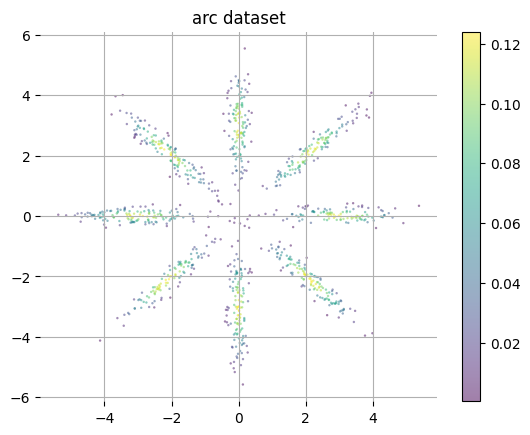

In [ ]:
plot(X_train, X_train_densities, X_test, X_test_densities)

In [ ]:
x, y = np.mgrid[-7:7:(14/120), -7:7:(14/120)]
pos = np.dstack((x, y))
X_plot = pos.reshape([14400,2])

# Constants




In [96]:
## Change these values accordingly

DATA_SET = "Arc" ## change dataset accordingly
NUM_QUBITS_FFS = 5 ## set 6 for the final experiments
NUM_ANCILLA_QUBITS = 2 # set 2 for the final experiments

#######

GAMMA_DICT = {"Binomial": 2., "Potential 1": 4., "Potential 2": 16., "Arc": 4., "Star": 16.}
RANDOM_STATE_QRFF_DICT = {"Binomial": 324, "Potential 1": 125, "Potential 2": 178, "Arc": 7, "Star": 1224}
RANDOM_STATE_QEFF_DICT = {"Binomial": 3, "Potential 1": 15, "Potential 2": 78, "Arc": 73, "Star": 24}
EPOCHS_DICT  = {"Binomial": 0, "Potential 1": 8, "Potential 2": 0, "Arc": 60, "Star": 60}
LEARNING_RATE_DICT = {"Binomial": 0.0005, "Potential 1": 0.0005, "Potential 2": 0.005, "Arc": 0.0005, "Star": 0.0005}
GAMMA = GAMMA_DICT[DATA_SET]
RANDOM_STATE_QRFF = RANDOM_STATE_QRFF_DICT[DATA_SET]
RANDOM_STATE_QEFF = RANDOM_STATE_QEFF_DICT[DATA_SET]
LEARNING_RATE = LEARNING_RATE_DICT[DATA_SET]
EPOCHS = EPOCHS_DICT[DATA_SET]
DIM_X = X_train.shape[1]
N_TRAINING_DATA = X_train.shape[0]
N_FFS = 2**NUM_QUBITS_FFS

###
# EPOCHS = 20

DATA_SET, EPOCHS, NUM_QUBITS_FFS, NUM_ANCILLA_QUBITS, GAMMA, RANDOM_STATE_QRFF, RANDOM_STATE_QEFF, DIM_X, N_FFS, LEARNING_RATE, N_TRAINING_DATA

('Arc', 20, 5, 2, 4.0, 7, 73, 2, 32, 0.0005, 10000)

In [97]:
#GAMMA *= 128

GAMMA

4.0

# RAW-KDE

In [98]:
def calculate_constant_qmkde(gamma=1, dimension = 1):
  sigma = (4*gamma)**(-1/2)
  coefficient = 1 /  (2*np.pi*sigma**2)**(dimension/2)
  return coefficient

In [99]:
def raw_kde(x_test, x_train, gamma=1):
  sigma = (2*gamma)**(-1/2)
  euclidean_distance = np.sum(((x_test-x_train))**2, axis=1)
  exponential  = np.exp(-euclidean_distance/(2*sigma**2))
  constant_outside = 1/(len(x_train) * (2*np.pi*sigma**2)**(x_train.shape[1]/2))
  return constant_outside * np.sum(exponential)

In [100]:
# Given the eigenvalues this function return a Unitary gate which converts the |0> -> |psi_train>
def create_U_train(x_train_param, seed=0):
  np.random.seed(seed)
  size_U = len(x_train_param)
  U_train = np.zeros((size_U, size_U), dtype = np.complex128)
  x_1 = x_train_param
  U_train[:, 0] = x_1
  for i in range(1, size_U):
    x_i =  np.complex128(np.random.randn(size_U) + 1j*np.random.randn(size_U))
    for j in range(0, i):
      x_i -= x_i.dot(np.conjugate(U_train[:, j])) * U_train[:, j]
    x_i = x_i/np.linalg.norm(x_i)
    U_train[:, i] = x_i

  return U_train

In [101]:
#raw_kde_probability = np.array([raw_kde(x_temp[np.newaxis,:], X_train[600:601], GAMMA) for x_temp in X_plot]) # uncomment for a single point
raw_kde_probability = np.array([raw_kde(x_temp[np.newaxis,:], X_train, GAMMA) for x_temp in X_plot])
raw_kde_probability_train = np.array([raw_kde(x_temp[np.newaxis,:], X_train, GAMMA) for x_temp in X_train])
raw_kde_probability_test = np.array([raw_kde(x_temp[np.newaxis,:], X_train, GAMMA) for x_temp in X_test])

raw_kde_probability.shape, raw_kde_probability_train.shape, raw_kde_probability_test.shape

((14400,), (10000,), (2000,))

max probability: 0.037623934561944586
min probability: 0.0
log max probability: -3.2801148736045485
log min probability: -inf


<ipython-input-102-c17019954dec>:15: RuntimeWarning: divide by zero encountered in log
  print("log min probability:", np.log(raw_kde_probability.min()))


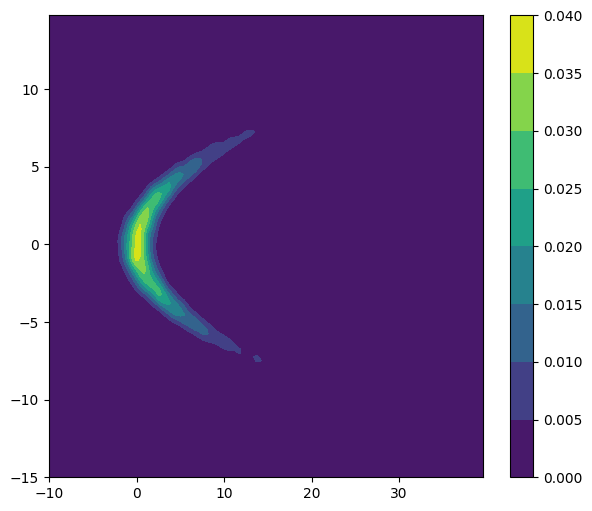

In [102]:
params = {
   'axes.labelsize': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [7.0, 6.0]
   }
plt.rcParams.update(params)

print("max probability:", raw_kde_probability.max())
print("min probability:", raw_kde_probability.min())

print("log max probability:", np.log(raw_kde_probability.max()))
print("log min probability:", np.log(raw_kde_probability.min()))

plt.contourf(x, y, raw_kde_probability.reshape([120,120]))
plt.colorbar()
plt.savefig("spiralsdmkde.pdf")

In [103]:
#np.savetxt("predictions_rawkde_210424.csv", raw_kde_probability, delimiter=",")  ### Added for saving the array of predictions in csv
#np.save("predictions_rawkde_210424", raw_kde_probability) ### Added for saving the array of predictions

# DMKDE QRFF Classical

In [64]:
import qmc.tf.layers as qmc_layers
import qmc.tf.models as qmc_models

In [65]:
N_FFS = 32

type_ffs = "qrff"
if type_ffs == "rff":
  fm_x = qmc_layers.QFeatureMapRFF(DIM_X, dim=N_FFS, gamma=GAMMA/2, random_state= RANDOM_STATE_QRFF)
  qmd = qmc_models.QMDensity(fm_x, N_FFS)
elif type_ffs == "qrff":
  fm_x = qmc_layers.QFeatureMapComplexRFF(DIM_X, dim=N_FFS, gamma=GAMMA/2, random_state= RANDOM_STATE_QRFF)
  qmd = qmc_models.ComplexQMDensity(fm_x, N_FFS)
qmd.compile()
qmd.fit(X_train, epochs=1)
#qmd.fit(X_train[600:601], epochs=1) # uncomment for single point prediction

predictions_classical = tf.cast(tf.math.pow((GAMMA/(tf.constant(math.pi))), DIM_X/2)*qmd.predict(X_plot), tf.float32).numpy()
predictions_classical_train = tf.cast(tf.math.pow((GAMMA/(tf.constant(math.pi))), DIM_X/2)*qmd.predict(X_train), tf.float32).numpy()
predictions_classical_test = tf.cast(tf.math.pow((GAMMA/(tf.constant(math.pi))), DIM_X/2)*qmd.predict(X_test), tf.float32).numpy()

 34/313 [==>...........................] - ETA: 0s 

/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/gen_math_ops.py:6751: ComplexWarning: Casting complex values to real discards the imaginary part
  _result = pywrap_tfe.TFE_Py_FastPathExecute(


63/63 [==============================] - 0s 2ms/step


max probability: 0.06635441
min probability: 0.030194847
log max probability: -2.7127452
log min probability: -3.500084


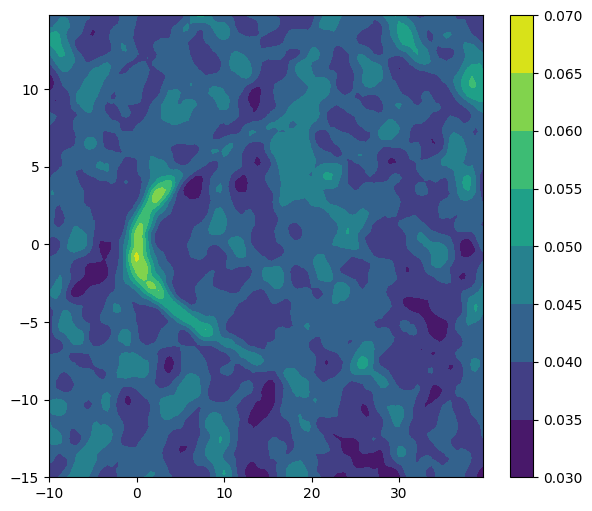

In [66]:
params = {
   'axes.labelsize': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [7.0, 6.0]
   }
plt.rcParams.update(params)

print("max probability:", predictions_classical.max())
print("min probability:", predictions_classical.min())

print("log max probability:", np.log(predictions_classical.max()))
print("log min probability:", np.log(predictions_classical.min()))

plt.contourf(x, y, predictions_classical.reshape([120,120]))
plt.colorbar()
plt.savefig("spiralsdmkde_classical.pdf")

In [67]:
#np.savetxt("predictions_dmkde_classical_mixed_QRFF_210424.csv", predictions_classical, delimiter=",")  ### Added for saving the array of predictions in csv
#np.save("predictions_dmkde_classical_mixed_QRFF_210424", predictions_classical) ### Added for saving the array of predictions

#files.download("predictions_quantum_dmkde_mixed_QEFF_HEA.npy")
#files.download("predictions_quantum_dmkde_mixed_QEFF_HEA.csv")

# DMKDE QEFF Classical

In [68]:
import qmc.tf.layers as qmc_layers
import qmc.tf.models as qmc_models

In [69]:
tc.set_backend("tensorflow")
tc.set_dtype("complex128")

class QFeatureMapQuantumEnhancedFF(tf.keras.layers.Layer):
    """Quantum feature map including the complex part of random Fourier Features.
    Uses `RBFSampler` from sklearn to approximate an RBF kernel using
    complex random Fourier features.

    Input shape:
        (batch_size, dim_in)
    Output shape:
        (batch_size, dim)
    Arguments:
        input_dim: dimension of the input
        dim: int. Number of dimensions to represent a sample.
        gamma: float. Gamma parameter of the RBF kernel to be approximated.
        random_state: random number generator seed.
    """

    def __init__(
            self,
            input_dim: int,
            dim: int = 100,
            gamma: float = 0.5,
            random_state=None,
            **kwargs
    ):
        super().__init__(**kwargs)
        self.input_dim = input_dim
        self.dim = dim
        self.gamma = gamma
        self.random_state = random_state


    def build(self, input_shape):
        self.qeff_weights = tf.random.normal((self.input_dim, int(self.dim*1-1)), mean = 0.0, stddev = 2.0/np.sqrt(self.dim - 1), dtype=tf.dtypes.float64, seed = self.random_state) ## final model self.qeff_weights = tf.random.normal((self.input_dim, int(self.dim*1-1)), mean = 0.0, stddev = 2.0/np.sqrt(self.dim - 1), dtype=tf.dtypes.float64, seed = self.random_state)
        self.built = True

    def call(self, inputs):

        ### build the phases of QEFF
        phases_temp = (tf.cast(tf.sqrt(self.gamma), tf.float64)*tf.linalg.matmul(tf.cast(inputs, tf.float64), self.qeff_weights))[0]

        ### indices qeff for iterator
        index_iter_qeff = iter(np.arange(self.qeff_weights.shape[1]))

        ## build QEFF circuit
        self.n_qeff_qubits = int(np.ceil(np.log2(self.dim)))
        self.circuit = tc.Circuit(self.n_qeff_qubits)

        def circuit_base_rz_qeff_n(qc_param, num_qubits_param, target_qubit_param):
          if num_qubits_param == 1:
            qc_param.rz(0, theta = phases_temp[next(index_iter_qeff)] )
          elif num_qubits_param == 2:
            qc_param.rz(target_qubit_param, theta = phases_temp[next(index_iter_qeff)])
            qc_param.cnot(0, target_qubit_param)
            qc_param.rz(target_qubit_param, theta = phases_temp[next(index_iter_qeff)])
            return
          else:
            circuit_base_rz_qeff_n(qc_param, num_qubits_param-1, target_qubit_param)
            qc_param.cnot(num_qubits_param-2, target_qubit_param)
            circuit_base_rz_qeff_n(qc_param, num_qubits_param-1, target_qubit_param)
            target_qubit_param -= 1

        # Applying the QEFF feature map

        for i in range(0, self.n_qeff_qubits):
          self.circuit.H(i)

        for i in range(1, self.n_qeff_qubits + 1):
          circuit_base_rz_qeff_n(self.circuit, i, i - 1)

        psi = tf.cast(tf.expand_dims(self.circuit.state(), axis=0), tf.complex64)
        return psi

    def get_config(self):
        config = {
            "input_dim": self.input_dim,
            "dim": self.dim,
            "gamma": self.gamma,
            "random_state": self.random_state
        }
        base_config = super().get_config()
        return {**base_config, **config}

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.dim)

In [70]:
fm_qeff_x = QFeatureMapQuantumEnhancedFF(DIM_X, dim=N_FFS, gamma=GAMMA, random_state= RANDOM_STATE_QEFF)
qmd = qmc_models.ComplexQMDensity(fm_qeff_x, N_FFS)
qmd.compile()
qmd.fit(X_train, epochs=1, batch_size = 1) ### must keep the batch size = 1
#qmd.fit(X_train[600:601], epochs=1, batch_size = 1) ### must keep the batch size = 1, uncomment for single point prediction
predictions_classical_qeff = tf.cast(tf.math.pow((GAMMA/(tf.constant(math.pi))), DIM_X/2)*qmd.predict(X_plot, batch_size = 1), tf.float32).numpy()
predictions_classical_qeff_train = tf.cast(tf.math.pow((GAMMA/(tf.constant(math.pi))), DIM_X/2)*qmd.predict(X_train, batch_size = 1), tf.float32).numpy()
predictions_classical_qeff_test = tf.cast(tf.math.pow((GAMMA/(tf.constant(math.pi))), DIM_X/2)*qmd.predict(X_test, batch_size = 1), tf.float32).numpy()

   51/10000 [..............................] - ETA: 20s

/usr/local/lib/python3.10/dist-packages/tensorflow/python/ops/gen_math_ops.py:6751: ComplexWarning: Casting complex values to real discards the imaginary part
  _result = pywrap_tfe.TFE_Py_FastPathExecute(


2000/2000 [==============================] - 4s 2ms/step


max probability: 0.08131324
min probability: 0.026576912
log max probability: -2.5094464
log min probability: -3.6277125


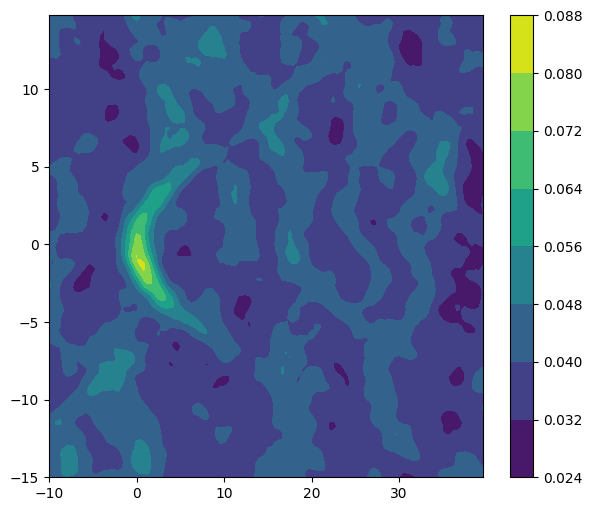

In [71]:
params = {
   'axes.labelsize': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [7.0, 6.0]
   }
plt.rcParams.update(params)

print("max probability:", predictions_classical_qeff.max())
print("min probability:", predictions_classical_qeff.min())

print("log max probability:", np.log(predictions_classical_qeff.max()))
print("log min probability:", np.log(predictions_classical_qeff.min()))

plt.contourf(x, y, predictions_classical_qeff.reshape([120,120]))
plt.colorbar()
plt.savefig("spiralsdmkde_classical.pdf")

In [72]:
#np.savetxt("predictions_dmkde_classical_mixed_QRFF_210424.csv", predictions_classical, delimiter=",")  ### Added for saving the array of predictions in csv
#np.save("predictions_dmkde_classical_mixed_QRFF_210424", predictions_classical) ### Added for saving the array of predictions

#files.download("predictions_quantum_dmkde_mixed_QEFF_HEA.npy")
#files.download("predictions_quantum_dmkde_mixed_QEFF_HEA.csv")

# VQ-KDE Mixed with QRFF


In [104]:
import matplotlib.pyplot as plt

In [105]:
#pip install -U qiskit

In [111]:
### DMKDE mixed

import tensorcircuit as tc
from tensorcircuit import keras
import tensorflow as tf

from functools import partial
import numpy as np
import math as m
from scipy.stats import entropy, spearmanr



tc.set_backend("tensorflow")
tc.set_dtype("complex128")

pi = tf.constant(m.pi)

class VQKDE_QRFF:
    r"""
    Defines the ready-to-use Density Matrix Kernel Density Estimation (DMKDE) model implemented
    in TensorCircuit using the TensorFlow/Keras API. Any additional argument in the methods has to be Keras-compliant.

    Args:
        auto_compile: A boolean to autocompile the model using default settings. (Default True).
        var_pure_state_size:
        gamma:

    Returns:
        An instantiated model ready to train with ad-hoc data.

    """

    def __init__(self, dim_x_param, n_qrff_qubits, n_ancilla_qubits, gamma, learning_rate = 0.0005, n_training_data = 10000, auto_compile=True):

        self.circuit = None
        self.gamma = gamma
        self.dim_x = dim_x_param
        self.n_qrff_qubits = n_qrff_qubits
        self.n_ancilla_qubits = n_ancilla_qubits
        self.n_total_qubits_temp = self.n_ancilla_qubits + self.n_qrff_qubits
        self.var_pure_state_parameters_size = 2*(2**self.n_total_qubits_temp - 1)
        self.n_training_data = n_training_data
        self.learning_rate = learning_rate
        #self.epochs = epochs

        layer = keras.QuantumLayer(
            partial(self.layer),
            [(self.var_pure_state_parameters_size,)]
            )

        self.model = tf.keras.Sequential([layer])

        if auto_compile:
            self.compile()


    def layer(
            self,
            U_dagger,
            var_pure_state_param,
        ):
        r"""
        Defines a Density Matrix Kernel Density Estimation quantum layer for learning with fixed qaff (Meaning of qaff?). (This function was originally named dmkde_mixed_variational_density_estimation_fixed_qaff)

        Args:
            U_dagger:
            var_pure_state_param:

        Returns:
            The probability of :math:`|000\rangle` state for density estimation.
        """

        index_it = iter(np.arange(len(var_pure_state_param)))

        # Instantiate a circuit with the calculated number of qubits.
        self.circuit = tc.Circuit(self.n_total_qubits_temp)

        def circuit_base_ry_n(qc_param, num_qubits_param, target_qubit_param):
            if num_qubits_param == 1:
                qc_param.ry(0, theta = var_pure_state_param[next(index_it)])
            elif num_qubits_param == 2:
                qc_param.ry(target_qubit_param, theta=var_pure_state_param[next(index_it)])
                qc_param.cnot(0, target_qubit_param)
                qc_param.ry(target_qubit_param, theta=var_pure_state_param[next(index_it)])
                return
            else:
                circuit_base_ry_n(qc_param, num_qubits_param-1, target_qubit_param)
                qc_param.cnot(num_qubits_param-2, target_qubit_param)
                circuit_base_ry_n(qc_param, num_qubits_param-1, target_qubit_param)
                target_qubit_param -= 1

        def circuit_base_rz_n(qc_param, num_qubits_param, target_qubit_param):
            if num_qubits_param == 1:
                qc_param.rz(0, theta = var_pure_state_param[next(index_it)])
            elif num_qubits_param == 2:
                qc_param.rz(target_qubit_param, theta=var_pure_state_param[next(index_it)])
                qc_param.cnot(0, target_qubit_param)
                qc_param.rz(target_qubit_param, theta=var_pure_state_param[next(index_it)])
                return
            else:
                circuit_base_rz_n(qc_param, num_qubits_param-1, target_qubit_param)
                qc_param.cnot(num_qubits_param-2, target_qubit_param)
                circuit_base_rz_n(qc_param, num_qubits_param-1, target_qubit_param)
                target_qubit_param -= 1

        # Learning pure state
        for i in range(1, self.n_total_qubits_temp+1):
            circuit_base_ry_n(self.circuit, i, i-1)

        # Learning pure state complex phase
        for j in range(1, self.n_total_qubits_temp+1):
            circuit_base_rz_n(self.circuit, j, j-1)

        # Value to predict
        self.circuit.any(
            *[n for n in range(self.n_qrff_qubits)], unitary=U_dagger
        )

        # Trace out ancilla qubits, find probability of [000] state for density estimation
        return tc.backend.real(
                    tc.quantum.reduced_density_matrix(
                        self.circuit.state(),
                        cut=[m for m in range(self.n_qrff_qubits, self.n_total_qubits_temp)]
                    )[0, 0]
                      )

    def loss(self, x_pred, y_pred):
        return -(1./self.n_training_data)*tf.reduce_sum(tf.math.log(y_pred))

    def compile(
            self,
            optimizer=tf.keras.optimizers.legacy.Adam,
            **kwargs):
        r"""
        Method to compile the model.

        Args:
            optimizer:
            **kwargs: Any additional argument.

        Returns:
            None.
        """
        self.model.compile(
            loss = self.loss,
            optimizer=optimizer(self.learning_rate),
            metrics=[tf.keras.metrics.KLDivergence()],
            **kwargs
        )

    def fit(self, x_train, y_train, batch_size=16, epochs = 60, **kwargs):
        r"""
        Method to fit (train) the model using the ad-hoc dataset.

        Args:
            x_train:
            y_train:
            batch_size:
            epochs:
            **kwargs: Any additional argument.

        Returns:
            None.
        """

        self.model.fit(x_train, y_train, batch_size=batch_size, epochs = epochs, **kwargs)

    def predict(self, x_test):
        r"""
        Method to make predictions with the trained model.

        Args:
            x_test:

        Returns:
            The predictions of the PDF of the input data.
        """
        return (tf.math.pow((self.gamma/(tf.constant(m.pi))), self.dim_x/2)*\
                self.model.predict(x_test)).numpy()

## VQ-KDE mixed with QRFF training

In [107]:
#weights_ffs_temp = fm_x.rff_weights.numpy()/np.sqrt(GAMMA) ## originally 2. weights extracted from classical DMKDE
r = np.random.RandomState(RANDOM_STATE_QRFF)
weights_ffs_temp = r.normal(0, 1, (DIM_X, N_FFS))

weights_ffs_temp.mean(), weights_ffs_temp.std(), weights_ffs_temp.shape

(-0.04872331083848644, 1.071758780018467, (2, 32))

In [108]:
def predict_features(X_param, var_param, gamma_param):
  X_feat = np.ones((len(X_param), var_param.shape[1]), dtype = np.complex128)
  X_feat[:, :] = np.cos(np.sqrt(gamma_param)*(X_param @ var_param)) - 1j*np.sin(np.sqrt(gamma_param)*(X_param @ var_param))
  X_feat *= np.sqrt(1/(var_param.shape[1]))
  return X_feat

X_feat_train = predict_features(X_train, weights_ffs_temp, GAMMA)
X_feat_test = predict_features(X_test, weights_ffs_temp, GAMMA)
X_feat_plot = predict_features(X_plot, weights_ffs_temp, GAMMA)
y_expected =  raw_kde_probability_train

X_feat_train.shape, X_feat_test.shape, X_feat_plot.shape, y_expected.shape

((10000, 32), (2000, 32), (14400, 32), (10000,))

In [109]:
## Convert states to unitaries (3,5 mins with 10000)

U_train_conjTrans = np.array([np.conjugate(create_U_train(X_feat_train[i]).T) for i in range(len(X_feat_train))])
U_test_conjTrans = np.array([np.conjugate(create_U_train(X_feat_test[i]).T) for i in range(len(X_feat_test))])
U_plot_conjTrans = np.array([np.conjugate(create_U_train(X_feat_plot[i]).T) for i in range(len(X_feat_plot))])

U_train_conjTrans.shape, U_test_conjTrans.shape, U_plot_conjTrans.shape

((10000, 32, 32), (2000, 32, 32), (14400, 32, 32))

In [112]:
#LEARNING_RATE = 0.005 ### Hyperparameter original 0.0005
y_expected =  raw_kde_probability_train*(np.pi/GAMMA)

vc = VQKDE_QRFF(dim_x_param = DIM_X, n_qrff_qubits = NUM_QUBITS_FFS, n_ancilla_qubits =  NUM_ANCILLA_QUBITS, learning_rate = LEARNING_RATE, n_training_data = N_TRAINING_DATA, gamma=GAMMA) # best 8 epochs

vc.fit(U_train_conjTrans, y_expected, batch_size=16, epochs = EPOCHS)

Epoch 1/20
625/625 [==============================] - 175s 25ms/step - loss: 0.0055 - kullback_leibler_divergence: -0.1393
Epoch 2/20
625/625 [==============================] - 16s 26ms/step - loss: 0.0052 - kullback_leibler_divergence: -0.2206
Epoch 3/20
625/625 [==============================] - 16s 26ms/step - loss: 0.0050 - kullback_leibler_divergence: -0.2554
Epoch 4/20
625/625 [==============================] - 15s 25ms/step - loss: 0.0049 - kullback_leibler_divergence: -0.2764
Epoch 5/20
625/625 [==============================] - 16s 26ms/step - loss: 0.0048 - kullback_leibler_divergence: -0.2909
Epoch 6/20
625/625 [==============================] - 15s 24ms/step - loss: 0.0048 - kullback_leibler_divergence: -0.2943
Epoch 7/20
625/625 [==============================] - 16s 25ms/step - loss: 0.0048 - kullback_leibler_divergence: -0.2948
Epoch 8/20
625/625 [==============================] - 16s 25ms/step - loss: 0.0048 - kullback_leibler_divergence: -0.2948
Epoch 9/20
625/625 [===

In [113]:
#from google.colab import files  # for saving the predictions
predictions_quantum_dmkde_mixed_train = vc.predict(U_train_conjTrans)
predictions_quantum_dmkde_mixed_test = vc.predict(U_test_conjTrans)
predictions_quantum_dmkde_mixed_plot = vc.predict(U_plot_conjTrans)

#np.save("predictions_quantum_dmkde_mixed_QRFF", predictions_quantum_dmkde_mixed) ### Added for saving the array of predictions
#np.savetxt("predictions_quantum_dmkde_mixed_QRFF.csv", predictions_quantum_dmkde_mixed, delimiter=",")


#files.download("predictions_quantum_dmkde_mixed_QRFF.npy")
#files.download("predictions_quantum_dmkde_mixed_QRFF.csv")

raw_kde_probability_train.sum(), predictions_quantum_dmkde_mixed_train.sum(), raw_kde_probability_test.sum(), predictions_quantum_dmkde_mixed_test.sum(), predictions_quantum_dmkde_mixed_plot.sum(), predictions_quantum_dmkde_mixed_train.shape, predictions_quantum_dmkde_mixed_test.shape, predictions_quantum_dmkde_mixed_plot.shape

450/450 [==============================] - 5s 10ms/step


(183.68313931265635,
 734.4697,
 37.007585549040485,
 145.97346,
 554.46277,
 (10000,),
 (2000,),
 (14400,))

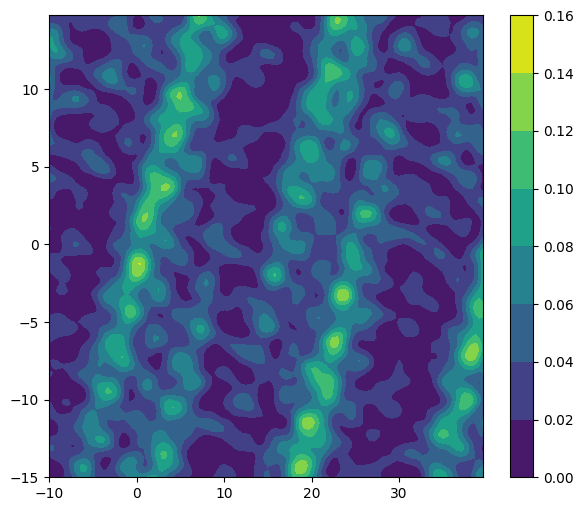

In [114]:
params = {
   'axes.labelsize': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [7.0, 6.0]
   }
plt.rcParams.update(params)

plt.contourf(x, y, predictions_quantum_dmkde_mixed_plot.reshape([120,120]))
plt.colorbar()
plt.savefig("spiralsdmkde_mixed_QRFF.pdf") ###changed name of the generated file

In [115]:
from tabulate import tabulate
def evaluate_model(y_true_param, y_pred_param, head):

  # Kl divergence
  kl_divergence_temp = tf.keras.metrics.kl_divergence(y_true_param, y_pred_param).numpy()
  #kl_divergence_temp = entropy(y_true_param, y_pred_param)

  # Calculate the ranks of the density values
  ranks1 = y_true_param.argsort().argsort()
  ranks2 = y_pred_param.argsort().argsort()

  # Calculate the Spearman correlation
  spearman_corr_temp, _ = spearmanr(ranks1, ranks2)

  # Calculate the absolute differences at each evaluation point
  absolute_differences_temp = np.abs(y_true_param - y_pred_param)

  # Average the absolute differences
  average_error_temp = np.mean(absolute_differences_temp)
  table = [["KL Divergence:", round(kl_divergence_temp,3)], ["Spearman Correlation:", round(spearman_corr_temp,3)], ["Mean Average Error:", round(average_error_temp,3)]]
  headers = ['Metrics', head]
  print(tabulate(table, headers), "\n")

def evaluate_likelihood(y_pred_param, head):

  # Negative log-likelihood
  negative_log_likelihood_temp = -tf.reduce_sum(tf.math.log(y_pred_param)).numpy()

  table = [["Negative loglikelihood:", round(negative_log_likelihood_temp, 3)]]
  headers = ['Metrics', head]
  print(tabulate(table, headers), "\n")

In [116]:
print("                                          ")
print("------ KDE vs DMKDE mixed average --------")
print("                                          ")
evaluate_model(raw_kde_probability_test, predictions_classical_test, "KDE vs DMKDE mixed average")
print("                                          ")
print("------ KDE vs VQ-KDE QRFF ------------")
print("                                          ")
evaluate_model(raw_kde_probability_test, predictions_quantum_dmkde_mixed_test, "KDE vs VQ-KDE QRFF")
print("                                          ")
print("--DMKDE mixed average vs VQ-KDE QRFF--")
print("                                          ")
evaluate_model(predictions_classical_test, predictions_quantum_dmkde_mixed_test,"DMKDE mixed average vs VQ-KDE QRFF")
print("                                          ")
print("--------KDE negative loglikelihood--------")
print("                                          ")
evaluate_likelihood(raw_kde_probability_test, "KDE negative loglikelihood")
print("                                          ")
print("DMKDE mixed average negative loglikelihood")
print("                                          ")
evaluate_likelihood(predictions_classical_test, "DMKDE mixed average likelihood")
print("                                          ")
print("---VQ-KDE QRFF negative loglikelihood-----")
print("                                          ")
evaluate_likelihood(predictions_quantum_dmkde_mixed_test, "VQ-KDE QRFF negative loglikelihood")

                                          
------ KDE vs DMKDE mixed average --------
                                          
Metrics                  KDE vs DMKDE mixed average
---------------------  ----------------------------
KL Divergence:                              -33.9
Spearman Correlation:                         0.905
Mean Average Error:                           0.033 

                                          
------ KDE vs VQ-KDE QRFF ------------
                                          
Metrics                  KDE vs VQ-KDE QRFF
---------------------  --------------------
KL Divergence:                      -47.372
Spearman Correlation:                 0.7
Mean Average Error:                   0.054 

                                          
--DMKDE mixed average vs VQ-KDE QRFF--
                                          
Metrics                  DMKDE mixed average vs VQ-KDE QRFF
---------------------  ------------------------------------
KL Divergence:       

# VQ-KDC Mixed with QEFF

This method uses QEFF, and normalizes the training with the number of epochs.

## VQ-KDC mixed with QEFF training

In [118]:
y_expected =  raw_kde_probability_train

In [119]:
LEARNING_RATE = 0.0005 ### Hyperparameter original 0.0005
y_expected =  raw_kde_probability_train*(np.pi/GAMMA)

vc = VQKDE_QEFF(dim_x_param = DIM_X, n_qeff_qubits = NUM_QUBITS_FFS, n_ancilla_qubits =  NUM_ANCILLA_QUBITS, gamma=GAMMA, learning_rate = LEARNING_RATE, random_state = RANDOM_STATE_QEFF, n_training_data = N_TRAINING_DATA) # best 8 epochs

vc.fit(X_train, y_expected, batch_size=16, epochs = EPOCHS)

Epoch 1/20
625/625 [==============================] - 172s 32ms/step - loss: 0.0053 - kullback_leibler_divergence: -0.1824
Epoch 2/20
625/625 [==============================] - 19s 30ms/step - loss: 0.0048 - kullback_leibler_divergence: -0.2789
Epoch 3/20
625/625 [==============================] - 21s 33ms/step - loss: 0.0047 - kullback_leibler_divergence: -0.2968
Epoch 4/20
625/625 [==============================] - 19s 30ms/step - loss: 0.0047 - kullback_leibler_divergence: -0.3124
Epoch 5/20
625/625 [==============================] - 19s 31ms/step - loss: 0.0046 - kullback_leibler_divergence: -0.3254
Epoch 6/20
625/625 [==============================] - 21s 33ms/step - loss: 0.0046 - kullback_leibler_divergence: -0.3315
Epoch 7/20
625/625 [==============================] - 19s 30ms/step - loss: 0.0046 - kullback_leibler_divergence: -0.3341
Epoch 8/20
625/625 [==============================] - 21s 33ms/step - loss: 0.0046 - kullback_leibler_divergence: -0.3358
Epoch 9/20
625/625 [===

In [120]:
#from google.colab import files  # for saving the predictions
predictions_quantum_dmkde_mixed_train = vc.predict(X_train)
predictions_quantum_dmkde_mixed_test = vc.predict(X_test)
predictions_quantum_dmkde_mixed_plot = vc.predict(X_plot)

#np.save("predictions_quantum_dmkde_mixed_QRFF", predictions_quantum_dmkde_mixed) ### Added for saving the array of predictions
#np.savetxt("predictions_quantum_dmkde_mixed_QRFF.csv", predictions_quantum_dmkde_mixed, delimiter=",")


#files.download("predictions_quantum_dmkde_mixed_QRFF.npy")
#files.download("predictions_quantum_dmkde_mixed_QRFF.csv")

predictions_quantum_dmkde_mixed_train.shape, predictions_quantum_dmkde_mixed_test.shape, predictions_quantum_dmkde_mixed_plot.shape

450/450 [==============================] - 8s 18ms/step


((10000,), (2000,), (14400,))

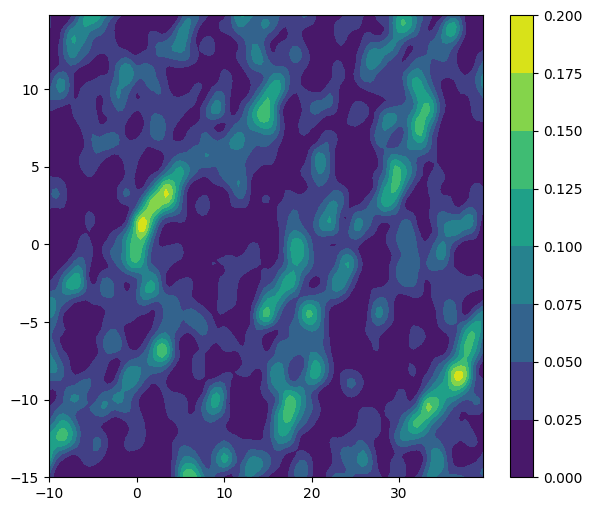

In [121]:
params = {
   'axes.labelsize': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [7.0, 6.0]
   }
plt.rcParams.update(params)

plt.contourf(x, y, predictions_quantum_dmkde_mixed_plot.reshape([120,120]))
plt.colorbar()
plt.savefig("spiralsdmkde_mixed_QRFF.pdf") ###changed name of the generated file

In [122]:
from tabulate import tabulate
def evaluate_model(y_true_param, y_pred_param, head):

  # Kl divergence
  kl_divergence_temp = tf.keras.metrics.kl_divergence(y_true_param, y_pred_param).numpy()
  #kl_divergence_temp = entropy(y_true_param, y_pred_param)

  # Calculate the ranks of the density values
  ranks1 = y_true_param.argsort().argsort()
  ranks2 = y_pred_param.argsort().argsort()

  # Calculate the Spearman correlation
  spearman_corr_temp, _ = spearmanr(ranks1, ranks2)

  # Calculate the absolute differences at each evaluation point
  absolute_differences_temp = np.abs(y_true_param - y_pred_param)

  # Average the absolute differences
  average_error_temp = np.mean(absolute_differences_temp)
  table = [["KL Divergence:", round(kl_divergence_temp,3)], ["Spearman Correlation:", round(spearman_corr_temp,3)], ["Mean Average Error:", round(average_error_temp,3)]]
  headers = ['Metrics', head]
  print(tabulate(table, headers), "\n")

def evaluate_likelihood(y_pred_param, head):

  # Negative log-likelihood
  negative_log_likelihood_temp = -tf.reduce_sum(tf.math.log(y_pred_param)).numpy()

  table = [["Negative loglikelihood:", round(negative_log_likelihood_temp, 3)]]
  headers = ['Metrics', head]
  print(tabulate(table, headers), "\n")

In [123]:
print("                                          ")
print("------ KDE vs DMKDE mixed average --------")
print("                                          ")
evaluate_model(raw_kde_probability_test, predictions_classical_qeff_test, "KDE vs DMKDE mixed average")
print("                                          ")
print("------ KDE vs VQ-KDE QEFF ------------")
print("                                          ")
evaluate_model(raw_kde_probability_test, predictions_quantum_dmkde_mixed_test, "KDE vs VQ-KDE QEFF")
print("                                          ")
print("--DMKDE mixed average vs VQ-KDE QEFF--")
print("                                          ")
evaluate_model(predictions_classical_qeff_test, predictions_quantum_dmkde_mixed_test,"DMKDE mixed average vs VQ-KDE QRFF")
print("                                          ")
print("--------KDE negative loglikelihood--------")
print("                                          ")
evaluate_likelihood(raw_kde_probability_test, "KDE negative loglikelihood")
print("                                          ")
print("DMKDE mixed average negative loglikelihood")
print("                                          ")
evaluate_likelihood(predictions_classical_qeff_test, "DMKDE mixed average likelihood")
print("                                          ")
print("---VQ-KDE QEFF negative loglikelihood-----")
print("                                          ")
evaluate_likelihood(predictions_quantum_dmkde_mixed_test, "VQ-KDE QEFF negative loglikelihood")

                                          
------ KDE vs DMKDE mixed average --------
                                          
Metrics                  KDE vs DMKDE mixed average
---------------------  ----------------------------
KL Divergence:                              -38.562
Spearman Correlation:                         0.949
Mean Average Error:                           0.039 

                                          
------ KDE vs VQ-KDE QEFF ------------
                                          
Metrics                  KDE vs VQ-KDE QEFF
---------------------  --------------------
KL Divergence:                      -57.056
Spearman Correlation:                 0.762
Mean Average Error:                   0.075 

                                          
--DMKDE mixed average vs VQ-KDE QEFF--
                                          
Metrics                  DMKDE mixed average vs VQ-KDE QRFF
---------------------  ------------------------------------
KL Divergence:   

# Constants HEA




In [135]:
## Change these values accordingly

DATA_SET = "Potential 2" ## change dataset accordingly
NUM_QUBITS_FFS = 5 ## set 6 for the final experiments
NUM_ANCILLA_QUBITS = 2 # set 2 for the final experiments

#######

GAMMA_DICT = {"Binomial": 2., "Potential 1": 4., "Potential 2": 16., "Arc": 4., "Star": 16.}
RANDOM_STATE_QRFF_DICT = {"Binomial": 324, "Potential 1": 125, "Potential 2": 178, "Arc": 7, "Star": 1224}
RANDOM_STATE_QEFF_DICT = {"Binomial": 3, "Potential 1": 15, "Potential 2": 78, "Arc": 73, "Star": 24}
EPOCHS_DICT  = {"Binomial": 0, "Potential 1": 8, "Potential 2": 60, "Arc": 60, "Star": 60}
LEARNING_RATE_DICT = {"Binomial": 0.0005, "Potential 1": 0.0005, "Potential 2": 0.005, "Arc": 0.0005, "Star": 0.0005}
GAMMA = GAMMA_DICT[DATA_SET]
RANDOM_STATE_QRFF = RANDOM_STATE_QRFF_DICT[DATA_SET]
RANDOM_STATE_QEFF = RANDOM_STATE_QEFF_DICT[DATA_SET]
LEARNING_RATE = LEARNING_RATE_DICT[DATA_SET]
EPOCHS = EPOCHS_DICT[DATA_SET]
DIM_X = X_train.shape[1]
N_TRAINING_DATA = X_train.shape[0]
N_FFS = 2**NUM_QUBITS_FFS
NUM_LAYERS_HEA = 3 ## set 3 for the final experiments
NUM_TOTAL_QUBITS = NUM_QUBITS_FFS + NUM_ANCILLA_QUBITS

###
#EPOCHS = 20


DATA_SET, EPOCHS, NUM_QUBITS_FFS, NUM_ANCILLA_QUBITS, GAMMA, RANDOM_STATE_QRFF, RANDOM_STATE_QEFF, DIM_X, N_FFS, NUM_LAYERS_HEA, LEARNING_RATE, N_TRAINING_DATA

('Potential 2', 20, 5, 2, 16.0, 178, 78, 2, 32, 3, 0.005, 10000)

# VQ-KDE Mixed with QRFF with HEA


In [125]:
import matplotlib.pyplot as plt

In [126]:
### DMKDE mixed

import tensorcircuit as tc
from tensorcircuit import keras
import tensorflow as tf

from functools import partial
import numpy as np
import math as m
from scipy.stats import entropy, spearmanr



tc.set_backend("tensorflow")
tc.set_dtype("complex128")

pi = tf.constant(m.pi)


class VQKDE_QRFF_HEA:
    r"""
    Defines the ready-to-use Density Matrix Kernel Density Estimation (DMKDE) model implemented
    in TensorCircuit using the TensorFlow/Keras API. Any additional argument in the methods has to be Keras-compliant.

    Args:
        auto_compile: A boolean to autocompile the model using default settings. (Default True).
        var_pure_state_size:
        gamma:

    Returns:
        An instantiated model ready to train with ad-hoc data.

    """

    def __init__(self, dim_x_param, n_qrff_qubits, n_ancilla_qubits, gamma, num_layers_hea = 3, learning_rate = 0.0005, n_training_data = 10000, auto_compile=True):

        self.circuit = None
        self.gamma = gamma
        self.dim_x = dim_x_param
        self.num_layers_hea = num_layers_hea
        self.n_qrff_qubits = n_qrff_qubits
        self.n_ancilla_qubits = n_ancilla_qubits
        self.n_total_qubits_temp = self.n_ancilla_qubits + self.n_qrff_qubits
        self.var_hea_ansatz_size = int(self.n_total_qubits_temp*(self.num_layers_hea+1)*2)
        self.n_training_data = n_training_data
        self.learning_rate = learning_rate

        layer = keras.QuantumLayer(
            partial(self.layer),
            [(self.var_hea_ansatz_size,)]
            )

        self.model = tf.keras.Sequential([layer])

        if auto_compile:
            self.compile()


    def layer(
            self,
            U_dagger,
            var_hea_ansatz_param,
        ):
        r"""
        Defines a Density Matrix Kernel Density Estimation quantum layer for learning with fixed qaff (Meaning of qaff?). (This function was originally named dmkde_mixed_variational_density_estimation_fixed_qaff)

        Args:
            U_dagger:
            var_pure_state_param:

        Returns:
            The probability of :math:`|000\rangle` state for density estimation.
        """

        index_iter_hea  = iter(np.arange(len(var_hea_ansatz_param)))

        # Instantiate a circuit with the calculated number of qubits.
        self.circuit = tc.Circuit(self.n_total_qubits_temp)

        def hea_ansatz(qc_param, num_qubits_param, num_layers_param):
          # encoding
          for i in range (0, num_qubits_param):
            qc_param.ry(i, theta = var_hea_ansatz_param[next(index_iter_hea)])
            qc_param.rz(i, theta = var_hea_ansatz_param[next(index_iter_hea)])
          # layers
          for j in range(num_layers_param):
            for i in range (0, num_qubits_param-1):
              qc_param.CNOT(i, i+1)

            for i in range (0, num_qubits_param):
              qc_param.ry(i, theta= var_hea_ansatz_param[next(index_iter_hea)])
              qc_param.rz(i, theta= var_hea_ansatz_param[next(index_iter_hea)])

        ## learning pure state with HEA

        hea_ansatz(self.circuit, self.n_total_qubits_temp, self.num_layers_hea)

        # Value to predict
        self.circuit.any(
            *[n for n in range(self.n_qrff_qubits)], unitary=U_dagger
        )

        # Trace out ancilla qubits, find probability of [000] state for density estimation
        return tc.backend.real(
                    tc.quantum.reduced_density_matrix(
                        self.circuit.state(),
                        cut=[m for m in range(self.n_qrff_qubits, self.n_total_qubits_temp)]
                    )[0, 0]
                      )

    def loss(self, x_pred, y_pred):
        return -(1./self.n_training_data)*tf.reduce_sum(tf.math.log(y_pred))

    def compile(
            self,
            optimizer=tf.keras.optimizers.legacy.Adam,
            **kwargs):
        r"""
        Method to compile the model.

        Args:
            optimizer:
            **kwargs: Any additional argument.

        Returns:
            None.
        """
        self.model.compile(
            loss = self.loss,
            optimizer=optimizer(self.learning_rate),
            metrics=[tf.keras.metrics.KLDivergence()],
            **kwargs
        )

    def fit(self, x_train, y_train, batch_size=16, epochs = 60, **kwargs):
        r"""
        Method to fit (train) the model using the ad-hoc dataset.

        Args:
            x_train:
            y_train:
            batch_size:
            epochs:
            **kwargs: Any additional argument.

        Returns:
            None.
        """

        self.model.fit(x_train, y_train, batch_size=batch_size, epochs = epochs, **kwargs)

    def predict(self, x_test):
        r"""
        Method to make predictions with the trained model.

        Args:
            x_test:

        Returns:
            The predictions of the PDF of the input data.
        """
        return (tf.math.pow((self.gamma/(tf.constant(m.pi))), self.dim_x/2)*\
                self.model.predict(x_test)).numpy()

## VQ-KDE mixed with QRFF with HEA training

In [127]:
#weights_ffs_temp = fm_x.rff_weights.numpy()/np.sqrt(GAMMA) ## originally 2. weights extracted from classical DMKDE
r = np.random.RandomState(RANDOM_STATE_QRFF)
weights_ffs_temp = r.normal(0, 1, (DIM_X, N_FFS))

weights_ffs_temp.mean(), weights_ffs_temp.std(), weights_ffs_temp.shape

(0.0019504978093023428, 0.8943425228114465, (2, 32))

In [128]:
def predict_features(X_param, var_param, gamma_param):
  X_feat = np.ones((len(X_param), var_param.shape[1]), dtype = np.complex128)
  X_feat[:, :] = np.cos(np.sqrt(gamma_param)*(X_param @ var_param)) - 1j*np.sin(np.sqrt(gamma_param)*(X_param @ var_param))
  X_feat *= np.sqrt(1/(var_param.shape[1]))
  return X_feat

X_feat_train = predict_features(X_train, weights_ffs_temp, GAMMA)
X_feat_test = predict_features(X_test, weights_ffs_temp, GAMMA)
X_feat_plot = predict_features(X_plot, weights_ffs_temp, GAMMA)
y_expected =  raw_kde_probability_train

X_feat_train.shape, X_feat_test.shape, X_feat_plot.shape, y_expected.shape

((10000, 32), (2000, 32), (14400, 32), (10000,))

In [129]:
## Convert states to unitaries (3,5 mins with 10000)

U_train_conjTrans = np.array([np.conjugate(create_U_train(X_feat_train[i]).T) for i in range(len(X_feat_train))])
U_test_conjTrans = np.array([np.conjugate(create_U_train(X_feat_test[i]).T) for i in range(len(X_feat_test))])
U_plot_conjTrans = np.array([np.conjugate(create_U_train(X_feat_plot[i]).T) for i in range(len(X_feat_plot))])

U_train_conjTrans.shape, U_test_conjTrans.shape, U_plot_conjTrans.shape

((10000, 32, 32), (2000, 32, 32), (14400, 32, 32))

In [130]:
#LEARNING_RATE = 0.005 ### Hyperparameter original 0.0005
y_expected =  raw_kde_probability_train*(np.pi/GAMMA)

vc = VQKDE_QRFF_HEA(dim_x_param = DIM_X, n_qrff_qubits = NUM_QUBITS_FFS, n_ancilla_qubits =  NUM_ANCILLA_QUBITS, gamma=GAMMA, num_layers_hea = NUM_LAYERS_HEA, learning_rate = LEARNING_RATE, n_training_data = N_TRAINING_DATA)

vc.fit(U_train_conjTrans, y_expected, batch_size=16, epochs = EPOCHS)

Epoch 1/60
625/625 [==============================] - 33s 26ms/step - loss: 0.0055 - kullback_leibler_divergence: -0.1193
Epoch 2/60
625/625 [==============================] - 18s 28ms/step - loss: 0.0051 - kullback_leibler_divergence: -0.1363
Epoch 3/60
625/625 [==============================] - 19s 31ms/step - loss: 0.0050 - kullback_leibler_divergence: -0.1391
Epoch 4/60
625/625 [==============================] - 18s 28ms/step - loss: 0.0050 - kullback_leibler_divergence: -0.1397
Epoch 5/60
625/625 [==============================] - 18s 29ms/step - loss: 0.0050 - kullback_leibler_divergence: -0.1408
Epoch 6/60
625/625 [==============================] - 17s 27ms/step - loss: 0.0049 - kullback_leibler_divergence: -0.1448
Epoch 7/60
625/625 [==============================] - 20s 32ms/step - loss: 0.0048 - kullback_leibler_divergence: -0.1500
Epoch 8/60
625/625 [==============================] - 17s 26ms/step - loss: 0.0047 - kullback_leibler_divergence: -0.1525
Epoch 9/60
625/625 [====

KeyboardInterrupt: 

In [131]:
#from google.colab import files  # for saving the predictions
predictions_quantum_dmkde_mixed_train = vc.predict(U_train_conjTrans)
predictions_quantum_dmkde_mixed_test = vc.predict(U_test_conjTrans)
predictions_quantum_dmkde_mixed_plot = vc.predict(U_plot_conjTrans)

#np.save("predictions_quantum_dmkde_mixed_QRFF", predictions_quantum_dmkde_mixed) ### Added for saving the array of predictions
#np.savetxt("predictions_quantum_dmkde_mixed_QRFF.csv", predictions_quantum_dmkde_mixed, delimiter=",")


#files.download("predictions_quantum_dmkde_mixed_QRFF.npy")
#files.download("predictions_quantum_dmkde_mixed_QRFF.csv")

raw_kde_probability_train.sum(), predictions_quantum_dmkde_mixed_train.sum(), raw_kde_probability_test.sum(), predictions_quantum_dmkde_mixed_test.sum(), predictions_quantum_dmkde_mixed_plot.sum(), predictions_quantum_dmkde_mixed_train.shape, predictions_quantum_dmkde_mixed_test.shape, predictions_quantum_dmkde_mixed_plot.shape

450/450 [==============================] - 20s 44ms/step


(183.68313931265635,
 2974.4678,
 37.007585549040485,
 598.5302,
 2268.6948,
 (10000,),
 (2000,),
 (14400,))

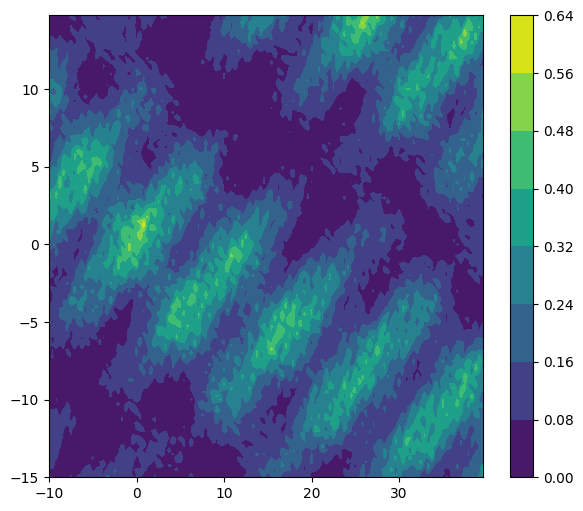

In [132]:
params = {
   'axes.labelsize': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [7.0, 6.0]
   }
plt.rcParams.update(params)

plt.contourf(x, y, predictions_quantum_dmkde_mixed_plot.reshape([120,120]))
plt.colorbar()
plt.savefig("spiralsdmkde_mixed_QRFF.pdf") ###changed name of the generated file

In [133]:
from tabulate import tabulate
def evaluate_model(y_true_param, y_pred_param, head):

  # Kl divergence
  kl_divergence_temp = tf.keras.metrics.kl_divergence(y_true_param, y_pred_param).numpy()
  #kl_divergence_temp = entropy(y_true_param, y_pred_param)

  # Calculate the ranks of the density values
  ranks1 = y_true_param.argsort().argsort()
  ranks2 = y_pred_param.argsort().argsort()

  # Calculate the Spearman correlation
  spearman_corr_temp, _ = spearmanr(ranks1, ranks2)

  # Calculate the absolute differences at each evaluation point
  absolute_differences_temp = np.abs(y_true_param - y_pred_param)

  # Average the absolute differences
  average_error_temp = np.mean(absolute_differences_temp)
  table = [["KL Divergence:", round(kl_divergence_temp,3)], ["Spearman Correlation:", round(spearman_corr_temp,3)], ["Mean Average Error:", round(average_error_temp,3)]]
  headers = ['Metrics', head]
  print(tabulate(table, headers), "\n")

def evaluate_likelihood(y_pred_param, head):

  # Negative log-likelihood
  negative_log_likelihood_temp = -tf.reduce_sum(tf.math.log(y_pred_param)).numpy()

  table = [["Negative loglikelihood:", round(negative_log_likelihood_temp, 3)]]
  headers = ['Metrics', head]
  print(tabulate(table, headers), "\n")

In [134]:
print("                                          ")
print("------ KDE vs DMKDE mixed average --------")
print("                                          ")
evaluate_model(raw_kde_probability_test, predictions_classical_test, "KDE vs DMKDE mixed average")
print("                                          ")
print("------ KDE vs VQ-KDE HEA QRFF ------------")
print("                                          ")
evaluate_model(raw_kde_probability_test, predictions_quantum_dmkde_mixed_test, "KDE vs VQ-KDE HEA QRFF")
print("                                          ")
print("--DMKDE mixed average vs VQ-KDE HEA QRFF--")
print("                                          ")
evaluate_model(predictions_classical_test, predictions_quantum_dmkde_mixed_test,"DMKDE mixed average vs VQ-KDE HEA QRFF")
print("                                          ")
print("--------KDE negative loglikelihood--------")
print("                                          ")
evaluate_likelihood(raw_kde_probability_test, "KDE negative loglikelihood")
print("                                          ")
print("DMKDE mixed average negative loglikelihood")
print("                                          ")
evaluate_likelihood(predictions_classical_test, "DMKDE mixed average likelihood")
print("                                          ")
print("---VQ-KDE HEA QRFF negative loglikelihood-----")
print("                                          ")
evaluate_likelihood(predictions_quantum_dmkde_mixed_test, "VQ-KDE HEA QRFF negative loglikelihood")

                                          
------ KDE vs DMKDE mixed average --------
                                          
Metrics                  KDE vs DMKDE mixed average
---------------------  ----------------------------
KL Divergence:                              -33.9
Spearman Correlation:                         0.905
Mean Average Error:                           0.033 

                                          
------ KDE vs VQ-KDE HEA QRFF ------------
                                          
Metrics                  KDE vs VQ-KDE HEA QRFF
---------------------  ------------------------
KL Divergence:                          -98.499
Spearman Correlation:                     0.568
Mean Average Error:                       0.281 

                                          
--DMKDE mixed average vs VQ-KDE HEA QRFF--
                                          
Metrics                  DMKDE mixed average vs VQ-KDE HEA QRFF
---------------------  ------------------------

# VQ-KDC Mixed with QEFF with HEA

This method uses QEFF, and normalizes the training with the number of epochs.

## VQ-KDC mixed with QEFF training

In [137]:
#LEARNING_RATE = 0.005 ### Hyperparameter original 0.0005
y_expected =  raw_kde_probability_train*(np.pi/GAMMA)

vc = VQKDE_QEFF_HEA(dim_x_param = DIM_X, n_qeff_qubits = NUM_QUBITS_FFS, n_ancilla_qubits =  NUM_ANCILLA_QUBITS, gamma=GAMMA, num_layers_hea = NUM_LAYERS_HEA, learning_rate = LEARNING_RATE, random_state = RANDOM_STATE_QEFF, n_training_data = N_TRAINING_DATA)

vc.fit(X_train, y_expected, batch_size=16, epochs = EPOCHS)

Epoch 1/20
625/625 [==============================] - 43s 14ms/step - loss: 0.0054 - kullback_leibler_divergence: -0.1208
Epoch 2/20
625/625 [==============================] - 7s 11ms/step - loss: 0.0053 - kullback_leibler_divergence: -0.1220
Epoch 3/20
625/625 [==============================] - 9s 15ms/step - loss: 0.0053 - kullback_leibler_divergence: -0.1228
Epoch 4/20
625/625 [==============================] - 8s 13ms/step - loss: 0.0052 - kullback_leibler_divergence: -0.1268
Epoch 5/20
625/625 [==============================] - 8s 13ms/step - loss: 0.0045 - kullback_leibler_divergence: -0.1520
Epoch 6/20
625/625 [==============================] - 9s 15ms/step - loss: 0.0045 - kullback_leibler_divergence: -0.1538
Epoch 7/20
625/625 [==============================] - 7s 12ms/step - loss: 0.0045 - kullback_leibler_divergence: -0.1542
Epoch 8/20
625/625 [==============================] - 9s 15ms/step - loss: 0.0044 - kullback_leibler_divergence: -0.1553
Epoch 9/20
625/625 [===========

In [138]:
#from google.colab import files  # for saving the predictions
predictions_quantum_dmkde_mixed_train = vc.predict(X_train)
predictions_quantum_dmkde_mixed_test = vc.predict(X_test)
predictions_quantum_dmkde_mixed_plot = vc.predict(X_plot)

#np.save("predictions_quantum_dmkde_mixed_QRFF", predictions_quantum_dmkde_mixed) ### Added for saving the array of predictions
#np.savetxt("predictions_quantum_dmkde_mixed_QRFF.csv", predictions_quantum_dmkde_mixed, delimiter=",")


#files.download("predictions_quantum_dmkde_mixed_QRFF.npy")
#files.download("predictions_quantum_dmkde_mixed_QRFF.csv")

raw_kde_probability_train.sum(), predictions_quantum_dmkde_mixed_train.sum(), raw_kde_probability_test.sum(), predictions_quantum_dmkde_mixed_test.sum(), predictions_quantum_dmkde_mixed_plot.sum(), predictions_quantum_dmkde_mixed_train.shape, predictions_quantum_dmkde_mixed_test.shape, predictions_quantum_dmkde_mixed_plot.shape

450/450 [==============================] - 6s 14ms/step


(183.68313931265635,
 3355.2456,
 37.007585549040485,
 668.17584,
 3935.038,
 (10000,),
 (2000,),
 (14400,))

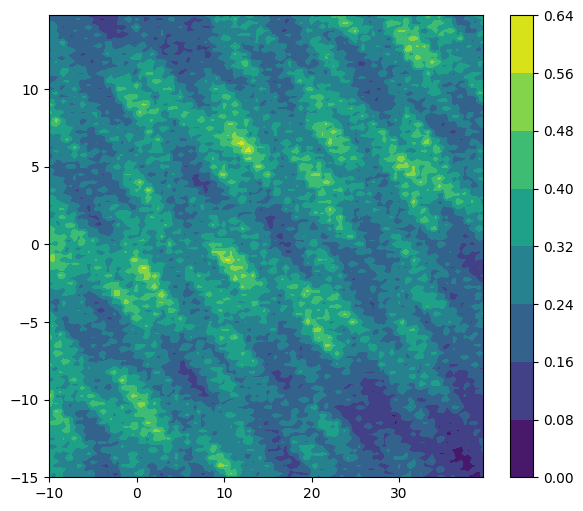

In [139]:
params = {
   'axes.labelsize': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [7.0, 6.0]
   }
plt.rcParams.update(params)

plt.contourf(x, y, predictions_quantum_dmkde_mixed_plot.reshape([120,120]))
plt.colorbar()
plt.savefig("spiralsdmkde_mixed_QRFF.pdf") ###changed name of the generated file

In [140]:
from tabulate import tabulate
def evaluate_model(y_true_param, y_pred_param, head):

  # Kl divergence
  kl_divergence_temp = tf.keras.metrics.kl_divergence(y_true_param, y_pred_param).numpy()
  #kl_divergence_temp = entropy(y_true_param, y_pred_param)

  # Calculate the ranks of the density values
  ranks1 = y_true_param.argsort().argsort()
  ranks2 = y_pred_param.argsort().argsort()

  # Calculate the Spearman correlation
  spearman_corr_temp, _ = spearmanr(ranks1, ranks2)

  # Calculate the absolute differences at each evaluation point
  absolute_differences_temp = np.abs(y_true_param - y_pred_param)

  # Average the absolute differences
  average_error_temp = np.mean(absolute_differences_temp)
  table = [["KL Divergence:", round(kl_divergence_temp,3)], ["Spearman Correlation:", round(spearman_corr_temp,3)], ["Mean Average Error:", round(average_error_temp,3)]]
  headers = ['Metrics', head]
  print(tabulate(table, headers), "\n")

def evaluate_likelihood(y_pred_param, head):

  # Negative log-likelihood
  negative_log_likelihood_temp = -tf.reduce_sum(tf.math.log(y_pred_param)).numpy()

  table = [["Negative loglikelihood:", round(negative_log_likelihood_temp, 3)]]
  headers = ['Metrics', head]
  print(tabulate(table, headers), "\n")

In [141]:
print("                                          ")
print("------ KDE vs DMKDE mixed average --------")
print("                                          ")
evaluate_model(raw_kde_probability_test, predictions_classical_qeff_test, "KDE vs DMKDE mixed average")
print("                                          ")
print("------ KDE vs VQ-KDE HEA QEFF ------------")
print("                                          ")
evaluate_model(raw_kde_probability_test, predictions_quantum_dmkde_mixed_test, "KDE vs VQ-KDE HEA QEFF")
print("                                          ")
print("--DMKDE mixed average vs VQ-KDE HEA QEFF--")
print("                                          ")
evaluate_model(predictions_classical_qeff_test, predictions_quantum_dmkde_mixed_test,"DMKDE mixed average vs VQ-KDE HEA QEFF")
print("                                          ")
print("--------KDE negative loglikelihood--------")
print("                                          ")
evaluate_likelihood(raw_kde_probability_test, "KDE negative loglikelihood")
print("                                          ")
print("DMKDE mixed average negative loglikelihood")
print("                                          ")
evaluate_likelihood(predictions_classical_qeff_test, "DMKDE mixed average likelihood")
print("                                          ")
print("--VQ-KDE HEA QEFF negative loglikelihood--")
print("                                          ")
evaluate_likelihood(predictions_quantum_dmkde_mixed_test, "VQ-KDE HEA QEFF negative loglikelihood")

                                          
------ KDE vs DMKDE mixed average --------
                                          
Metrics                  KDE vs DMKDE mixed average
---------------------  ----------------------------
KL Divergence:                              -38.562
Spearman Correlation:                         0.949
Mean Average Error:                           0.039 

                                          
------ KDE vs VQ-KDE HEA QEFF ------------
                                          
Metrics                  KDE vs VQ-KDE HEA QEFF
---------------------  ------------------------
KL Divergence:                         -101.358
Spearman Correlation:                     0.368
Mean Average Error:                       0.316 

                                          
--DMKDE mixed average vs VQ-KDE HEA QEFF--
                                          
Metrics                  DMKDE mixed average vs VQ-KDE HEA QEFF
---------------------  ----------------------

# Additional

## DMKDE QEFF Classical tests

In [ ]:
import qmc.tf.layers as qmc_layers
import qmc.tf.models as qmc_models

In [ ]:
tc.set_backend("tensorflow")
tc.set_dtype("complex128")

class QFeatureMapQuantumEnhancedFF(tf.keras.layers.Layer):
    """Quantum feature map including the complex part of random Fourier Features.
    Uses `RBFSampler` from sklearn to approximate an RBF kernel using
    complex random Fourier features.

    Input shape:
        (batch_size, dim_in)
    Output shape:
        (batch_size, dim)
    Arguments:
        input_dim: dimension of the input
        dim: int. Number of dimensions to represent a sample.
        gamma: float. Gamma parameter of the RBF kernel to be approximated.
        random_state: random number generator seed.
    """

    def __init__(
            self,
            input_dim: int,
            dim: int = 100,
            gamma: float = 0.5,
            random_state=None,
            **kwargs
    ):
        super().__init__(**kwargs)
        self.input_dim = input_dim
        self.dim = dim
        self.gamma = gamma
        self.random_state = random_state


    def build(self, input_shape):
        self.qeff_weights = tf.random.normal((self.input_dim, int(self.dim*1-1)), mean = 0.0, stddev = 2.0/np.sqrt(self.dim - 1), dtype=tf.dtypes.float64, seed = self.random_state) ## final model self.qeff_weights = tf.random.normal((self.input_dim, int(self.dim*1-1)), mean = 0.0, stddev = 2.0/np.sqrt(self.dim - 1), dtype=tf.dtypes.float64, seed = self.random_state)
        self.built = True

    def call(self, inputs):

        ### build the phases of QEFF
        phases_temp = (tf.cast(tf.sqrt(self.gamma), tf.float64)*tf.linalg.matmul(tf.cast(inputs, tf.float64), self.qeff_weights))[0]

        ### indices qeff for iterator
        index_iter_qeff = iter(np.arange(self.qeff_weights.shape[1]))

        ## build QEFF circuit
        self.n_qeff_qubits = int(np.ceil(np.log2(self.dim)))
        self.circuit = tc.Circuit(self.n_qeff_qubits)

        def circuit_base_rz_qeff_n(qc_param, num_qubits_param, target_qubit_param):
          if num_qubits_param == 1:
            qc_param.rz(0, theta = phases_temp[next(index_iter_qeff)] )
          elif num_qubits_param == 2:
            qc_param.rz(target_qubit_param, theta = phases_temp[next(index_iter_qeff)])
            qc_param.cnot(0, target_qubit_param)
            qc_param.rz(target_qubit_param, theta = phases_temp[next(index_iter_qeff)])
            return
          else:
            circuit_base_rz_qeff_n(qc_param, num_qubits_param-1, target_qubit_param)
            qc_param.cnot(num_qubits_param-2, target_qubit_param)
            circuit_base_rz_qeff_n(qc_param, num_qubits_param-1, target_qubit_param)
            target_qubit_param -= 1

        # Applying the QEFF feature map

        for i in range(0, self.n_qeff_qubits):
          self.circuit.H(i)

        for i in range(1, self.n_qeff_qubits + 1):
          circuit_base_rz_qeff_n(self.circuit, i, i - 1)

        psi = tf.cast(tf.expand_dims(self.circuit.state(), axis=0), tf.complex64)
        return psi

    def get_config(self):
        config = {
            "input_dim": self.input_dim,
            "dim": self.dim,
            "gamma": self.gamma,
            "random_state": self.random_state
        }
        base_config = super().get_config()
        return {**base_config, **config}

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.dim)

In [ ]:
N_NFF_TEMP = 64
RANDOM_STATE_QEFF = 190

fm_qeff_x = QFeatureMapQuantumEnhancedFF(DIM_X, dim=N_NFF_TEMP, gamma=GAMMA, random_state= RANDOM_STATE_QEFF)
qmd = qmc_models.ComplexQMDensity(fm_qeff_x, N_NFF_TEMP)
qmd.compile()
qmd.fit(X_train[600:601], epochs=1, batch_size = 1) ### must keep the batch size = 1
predictions_classical_qeff = tf.cast(tf.math.pow((GAMMA/(tf.constant(math.pi))), DIM_X/2)*qmd.predict(X_plot, batch_size = 1), tf.float32).numpy()
#predictions_classical_qeff_train = tf.cast(tf.math.pow((GAMMA/(tf.constant(math.pi))), DIM_X/2)*qmd.predict(X_train, batch_size = 1), tf.float32).numpy()
#predictions_classical_qeff_test = tf.cast(tf.math.pow((GAMMA/(tf.constant(math.pi))), DIM_X/2)*qmd.predict(X_test, batch_size = 1), tf.float32).numpy()

In [ ]:
params = {
   'axes.labelsize': 12,
   'legend.fontsize': 12,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [7.0, 6.0]
   }
plt.rcParams.update(params)

print("max probability:", predictions_classical_qeff.max())
print("min probability:", predictions_classical_qeff.min())

print("log max probability:", np.log(predictions_classical_qeff.max()))
print("log min probability:", np.log(predictions_classical_qeff.min()))

plt.contourf(x, y, predictions_classical_qeff.reshape([120,120]))
plt.colorbar()
plt.savefig("spiralsdmkde_classical.pdf")

In [ ]:

#np.savetxt("predictions_dmkde_classical_mixed_QRFF_210424.csv", predictions_classical, delimiter=",")  ### Added for saving the array of predictions in csv
#np.save("predictions_dmkde_classical_mixed_QRFF_210424", predictions_classical) ### Added for saving the array of predictions

#files.download("predictions_quantum_dmkde_mixed_QEFF_HEA.npy")
#files.download("predictions_quantum_dmkde_mixed_QEFF_HEA.csv")

In [ ]:
raw_kde_arg_max = np.argmax(raw_kde_probability.reshape([120,120])) % 120

#plt.plot(x[12:36, raw_kde_arg_max], predictions_classical_qeff.reshape([120,120])[12:36, raw_kde_arg_max], label = f"{N_FFS} QEFF, gamma = {GAMMA}")
#plt.plot(x[12:36, raw_kde_arg_max], predictions_classical.reshape([120,120])[12:36, raw_kde_arg_max], label = f"{N_FFS} QRFF, gamma = {GAMMA}")
#plt.plot(x[12:36, raw_kde_arg_max], raw_kde_probability.reshape([120,120])[12:36, raw_kde_arg_max], label = f"KDE, gamma = {GAMMA}")
plt.plot(x[:, raw_kde_arg_max], predictions_classical_qeff.reshape([120,120])[:, raw_kde_arg_max], label = f"{N_NFF_TEMP} QEFF, gamma = {GAMMA}")
plt.plot(x[:, raw_kde_arg_max], predictions_classical.reshape([120,120])[:, raw_kde_arg_max], label = f"{N_FFS} QRFF, gamma = {GAMMA}")
plt.plot(x[:, raw_kde_arg_max], raw_kde_probability.reshape([120,120])[:, raw_kde_arg_max], label = f"KDE, gamma = {GAMMA}")
plt.legend(loc='best')

plt.show()

## Circuits drawings

In [ ]:
import tensorcircuit as tc

In [ ]:
## mottonenn state preparation

n_qeff_qubits_temp = 2
n_ancilla_qubits_temp = 2
n_total_qubits_temp = n_qeff_qubits_temp + n_ancilla_qubits_temp
var_pure_state_size_param = 2*n_total_qubits_temp - 2

index_it = iter(np.arange(var_pure_state_size_param))

# Instantiate a circuit with the calculated number of qubits.
circuit = tc.Circuit(n_total_qubits_temp)

def circuit_base_ry_n(qc_param, num_qubits_param, target_qubit_param):
    if num_qubits_param == 1:
        qc_param.ry(0, theta = 0)
    elif num_qubits_param == 2:
        qc_param.ry(target_qubit_param, theta= 0)
        qc_param.cnot(target_qubit_param - 1, target_qubit_param)
        qc_param.ry(target_qubit_param, theta= 0)
        return
    else:
        circuit_base_ry_n(qc_param, num_qubits_param-1, target_qubit_param)
        qc_param.cnot(target_qubit_param-(num_qubits_param-1), target_qubit_param)
        circuit_base_ry_n(qc_param, num_qubits_param-1, target_qubit_param)
        target_qubit_param -= 1

def circuit_base_rz_n(qc_param, num_qubits_param, target_qubit_param):
    if num_qubits_param == 1:
        qc_param.rz(0, theta = 0)
    elif num_qubits_param == 2:
        qc_param.rz(target_qubit_param, theta= 0)
        qc_param.cnot(target_qubit_param - 1, target_qubit_param)
        qc_param.rz(target_qubit_param, theta= 0)
        return
    else:
        circuit_base_rz_n(qc_param, num_qubits_param-1, target_qubit_param)
        qc_param.cnot(target_qubit_param-(num_qubits_param-1), target_qubit_param)
        circuit_base_rz_n(qc_param, num_qubits_param-1, target_qubit_param)
        target_qubit_param -= 1

# Learning pure state
for i in range(1, n_total_qubits_temp+1):
    circuit_base_ry_n(circuit, i, i-1)

# Learning pure state complex phase
for j in range(1, n_total_qubits_temp+1):
    circuit_base_rz_n(circuit, j, j-1)

latex = circuit.tex()

Math(r'$%s$'%latex)

In [ ]:
## useche state preparation

n_qeff_qubits_temp = 2
n_ancilla_qubits_temp = 2
n_total_qubits_temp = n_qeff_qubits_temp + n_ancilla_qubits_temp
var_pure_state_size_param = 2*(n_total_qubits_temp**2 - 1)

var_pure_state_param = np.zeros(var_pure_state_size_param) ### delete in main class

index_it = iter(np.arange(var_pure_state_size_param))

# Instantiate a circuit with the calculated number of qubits.
circuit = tc.Circuit(n_total_qubits_temp)

def circuit_base_ry_n(qc_param, num_qubits_param, target_qubit_param):
  if num_qubits_param == 1:
      qc_param.ry(0, theta = var_pure_state_param[next(index_it)])
  elif num_qubits_param == 2:
      qc_param.ry(target_qubit_param, theta=var_pure_state_param[next(index_it)])
      qc_param.cnot(0, target_qubit_param)
      qc_param.ry(target_qubit_param, theta=var_pure_state_param[next(index_it)])
      return
  else:
      circuit_base_ry_n(qc_param, num_qubits_param-1, target_qubit_param)
      qc_param.cnot(num_qubits_param-2, target_qubit_param)
      circuit_base_ry_n(qc_param, num_qubits_param-1, target_qubit_param)
      target_qubit_param -= 1

def circuit_base_rz_n(qc_param, num_qubits_param, target_qubit_param):
  if num_qubits_param == 1:
      qc_param.rz(0, theta = var_pure_state_param[next(index_it)])
  elif num_qubits_param == 2:
      qc_param.rz(target_qubit_param, theta=var_pure_state_param[next(index_it)])
      qc_param.cnot(0, target_qubit_param)
      qc_param.rz(target_qubit_param, theta=var_pure_state_param[next(index_it)])
      return
  else:
      circuit_base_rz_n(qc_param, num_qubits_param-1, target_qubit_param)
      qc_param.cnot(num_qubits_param-2, target_qubit_param)
      circuit_base_rz_n(qc_param, num_qubits_param-1, target_qubit_param)
      target_qubit_param -= 1

# Learning pure state
for i in range(1, n_total_qubits_temp+1):
    circuit_base_ry_n(circuit, i, i-1)

# Learning pure state complex phase
for j in range(1, n_total_qubits_temp+1):
    circuit_base_rz_n(circuit, j, j-1)


latex = circuit.tex()

Math(r'$%s$'%latex)

In [ ]:
### Quantum efficient Fourier feautures with Mottonen SP

n_qeff_qubits_temp = 3
n_ancilla_qubits_temp = 2
n_total_qubits_temp = n_qeff_qubits_temp + n_ancilla_qubits_temp
num_ffs_temp = 2**n_qeff_qubits_temp

# Instantiate a circuit with the calculated number of qubits.
circuit = tc.Circuit(n_total_qubits_temp)
phases_temp = np.zeros(int(2*(num_ffs_temp-1)))
index_iter_qeff = iter(np.arange(len(phases_temp)))
print(len(phases_temp))

def circuit_base_rz_mottonen_qeff_n(qc_param, num_qubits_param, target_qubit_param):
  if num_qubits_param == 1:
    qc_param.rz(0, theta = phases_temp[next(index_iter_qeff)])
    qc_param.X(0)
    qc_param.rz(0, theta = phases_temp[next(index_iter_qeff)])
  elif num_qubits_param == 2:
    qc_param.rz(target_qubit_param, theta = phases_temp[next(index_iter_qeff)])
    qc_param.X(target_qubit_param)
    qc_param.rz(target_qubit_param, theta = phases_temp[next(index_iter_qeff)])
    qc_param.cnot((target_qubit_param - 1), target_qubit_param)
    qc_param.rz(target_qubit_param, theta = phases_temp[next(index_iter_qeff)])
    qc_param.X(target_qubit_param)
    qc_param.rz(target_qubit_param, theta = phases_temp[next(index_iter_qeff)])
    return
  else:
    circuit_base_rz_mottonen_qeff_n(qc_param, num_qubits_param-1, target_qubit_param)
    qc_param.cnot(target_qubit_param-(num_qubits_param-1), target_qubit_param)
    circuit_base_rz_mottonen_qeff_n(qc_param, num_qubits_param-1, target_qubit_param)
    target_qubit_param -= 1

# Applying the QEFF feature map

for i in reversed(range(1, n_qeff_qubits_temp + 1)):
  circuit_base_rz_mottonen_qeff_n(circuit, i, i - 1)

for i in range(0, n_qeff_qubits_temp):
  circuit.H(i)

latex = circuit.tex()

Math(r'$%s$'%latex)

In [ ]:
### Quantum efficient Fourier feautures with Useche SP

n_qeff_qubits_temp = 4
n_ancilla_qubits_temp = 2
n_total_qubits_temp = n_qeff_qubits_temp + n_ancilla_qubits_temp
num_ffs_temp = 2**n_qeff_qubits_temp

# Instantiate a circuit with the calculated number of qubits.
circuit = tc.Circuit(n_total_qubits_temp)
phases_temp = np.zeros(int(2*(num_ffs_temp-1)))
index_iter_qeff = iter(np.arange(len(phases_temp)))
print(len(phases_temp))

def circuit_base_rz_qeff_n(qc_param, num_qubits_param, target_qubit_param):
  if num_qubits_param == 1:
    qc_param.rz(0, theta = phases_temp[next(index_iter_qeff)])
    qc_param.X(0)
    qc_param.rz(0, theta = phases_temp[next(index_iter_qeff)])
  elif num_qubits_param == 2:
    qc_param.rz(target_qubit_param, theta = phases_temp[next(index_iter_qeff)])
    qc_param.X(target_qubit_param)
    qc_param.rz(target_qubit_param, theta = phases_temp[next(index_iter_qeff)])
    qc_param.cnot(0, target_qubit_param)
    qc_param.rz(target_qubit_param, theta = phases_temp[next(index_iter_qeff)])
    qc_param.X(target_qubit_param)
    qc_param.rz(target_qubit_param, theta = phases_temp[next(index_iter_qeff)])
    return
  else:
    circuit_base_rz_qeff_n(qc_param, num_qubits_param-1, target_qubit_param)
    qc_param.cnot(num_qubits_param-2, target_qubit_param)
    circuit_base_rz_qeff_n(qc_param, num_qubits_param-1, target_qubit_param)
    target_qubit_param -= 1

# Applying the QEFF feature map

#for i in reversed(range(1, n_qeff_qubits_temp + 1)):
for i in range(1, n_qeff_qubits_temp + 1):
  circuit_base_rz_qeff_n(circuit, i, i - 1)

for i in range(0, n_qeff_qubits_temp):
  circuit.H(i)

latex = circuit.tex()

Math(r'$%s$'%latex)

In [ ]:
### HEA Hardware efficient anzatz

n_qeff_qubits_temp = 3
n_ancilla_qubits_temp = 3
n_total_qubits_temp = n_qeff_qubits_temp + n_ancilla_qubits_temp
num_ffs_temp = 2**n_qeff_qubits_temp
num_layers_hea = 3
var_hea_ansatz_param = np.zeros(int(n_total_qubits_temp*(num_layers_hea+1)*2))
index_iter_hea = iter(np.arange(len(var_hea_ansatz_param)))


circuit = tc.Circuit(n_total_qubits_temp)

def hea_ansatz(qc_param, num_qubits_param, num_layers_param):
  # encoding
  for i in range (0, num_qubits_param):
    qc_param.ry(i, theta = var_hea_ansatz_param[next(index_iter_hea)])
    qc_param.rz(i, theta = var_hea_ansatz_param[next(index_iter_hea)])
  # layers
  for j in range(num_layers_param):
    for i in range (0, num_qubits_param-1):
      qc_param.CNOT(i, i+1)

    for i in range (0, num_qubits_param):
      qc_param.ry(i, theta= var_hea_ansatz_param[next(index_iter_hea)])
      qc_param.rz(i, theta= var_hea_ansatz_param[next(index_iter_hea)])

## learning pure state with HEA

hea_ansatz(circuit, n_total_qubits_temp, num_layers_hea)

latex = circuit.tex()

Math(r'$%s$'%latex)